<a href="https://colab.research.google.com/github/StevenXJiang/DataScienceModule2/blob/main/ISEN_370_Module_2_Project_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISEN 370 Module 2 Demonstration 
In this demo, you will be shown how to use data science tools to conduct a hypothesis testing for a given dataset.


# Import Libraries
We will need to import necessary libraries for the project.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Data Import

The Learning Enhanced Watershed Assessment System (LEWAS) is a unique real-time water and weather monitoring system. The LEWAS monitoring site is installed at the outfall of the Webb Branch watershed on Virginia Tech’s campus. Webb Branch is an urban stream with a 2.78 square kilometer (about one square mile) watershed consisting of residential and commercial properties. The stream is routed through man-made channels and culverts until it discharges at the LEWAS monitoring site.
We first import the LEWAS datasets and print the first 10 rows of data. The data is stored in CSV files for which the path is given in the cell below.
There are two CSV files, the first contains data from 9/28/16-9/30/16 and the second contains the same period a year later.

In [13]:
data_url1='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_1.csv'
data_url2='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_2.csv'


In [14]:
df1=pd.read_csv(data_url1)
df1.head(10)

,Date and Time,Water Temperature (F),Estimated Flow Rate (m3/s)
0,9/28/16 1:00 PM,64.562,0.073
1,9/28/16 1:01 PM,64.544,0.072
2,9/28/16 1:02 PM,64.544,0.073
3,9/28/16 1:03 PM,64.562,0.073
4,9/28/16 1:04 PM,64.544,0.070
5,9/28/16 1:05 PM,64.544,0.072
6,9/28/16 1:06 PM,64.544,0.068
7,9/28/16 1:07 PM,64.544,0.071
8,9/28/16 1:08 PM,64.580,0.070
9,9/28/16 1:09 PM,64.562,0.070


In [15]:
df2=pd.read_csv(data_url2)
df2.head(10)

,Date and Time,Water Temperature (F),Est. Flow Rate[m^3/s]
0,9/28/17 12:00 AM,66.560,0.001469
1,9/28/17 12:03 AM,66.560,0.001471
2,9/28/17 12:06 AM,66.542,0.006522
3,9/28/17 12:09 AM,66.560,0.004293
4,9/28/17 12:12 AM,66.542,0.002252
5,9/28/17 12:15 AM,66.560,0.009034
6,9/28/17 12:18 AM,66.542,0.005067
7,9/28/17 12:21 AM,66.578,-0.001823
8,9/28/17 12:24 AM,66.542,-0.007261
9,9/28/17 12:27 AM,66.524,-0.011683


## Exploring Data

We can use scatter plot to explore the explore the data.<br>
Generate two scatter plots: one for the data in 2016 and the other for the data in 2017.

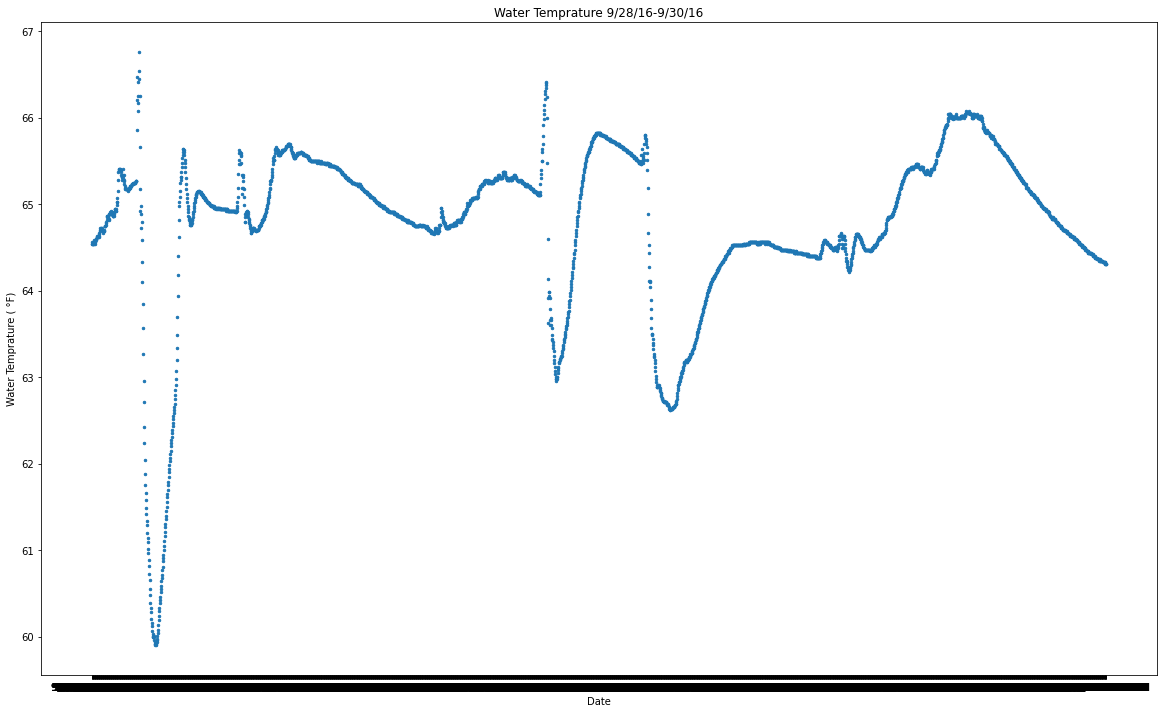

In [16]:
plt.figure(figsize=(20,12))
plt.scatter(df1["Date and Time"], df1["Water Temperature (F)"], s=6)
plt.title("Water Temprature 9/28/16-9/30/16")
plt.xlabel("Date")
plt.ylabel('Water Temprature ( \N{DEGREE SIGN}F)')
plt.show()

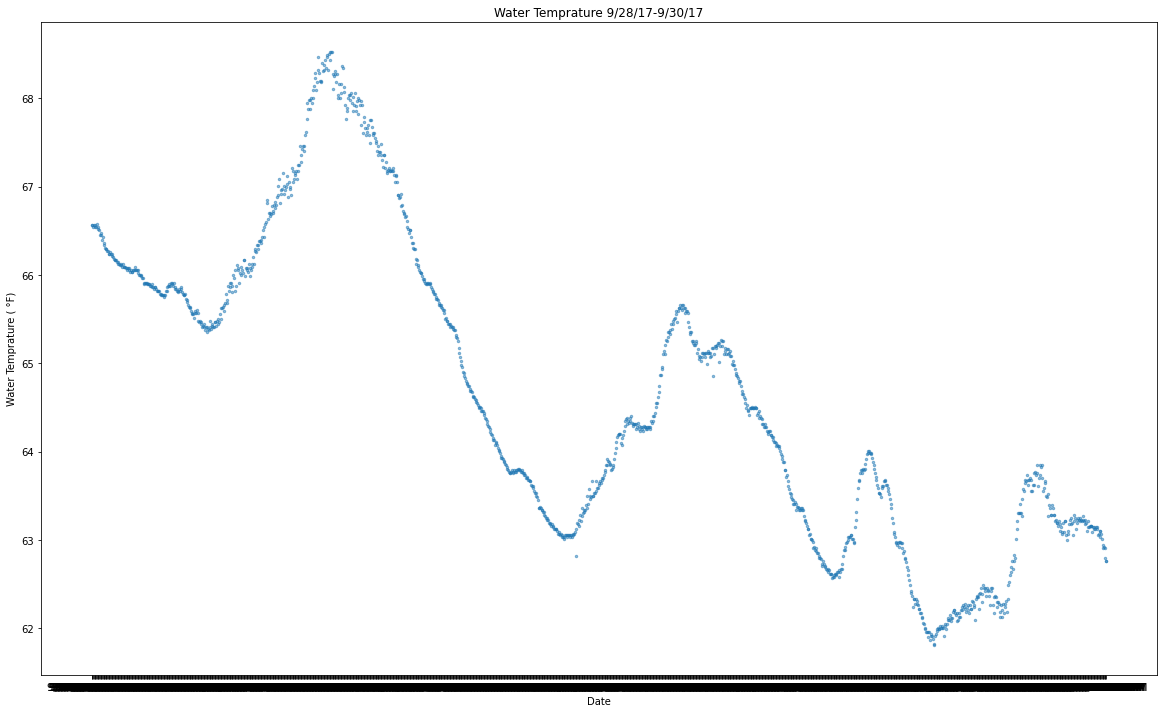

In [17]:
plt.figure(figsize=(20,12))
plt.scatter(df2["Date and Time"], df2["Water Temperature (F)"], s=6,alpha=0.5)
plt.title("Water Temprature 9/28/17-9/30/17")
plt.xlabel("Date")
plt.ylabel('Water Temprature ( \N{DEGREE SIGN}F)')
plt.show()

Histograms can be used to examine the ditribution of the data.

(array([  40.,   23.,   22.,   32.,  172.,  116.,  862., 1390.,  858.,
          22.]),
 array([59.9   , 60.5858, 61.2716, 61.9574, 62.6432, 63.329 , 64.0148,
        64.7006, 65.3864, 66.0722, 66.758 ]),
 <a list of 10 Patch objects>)

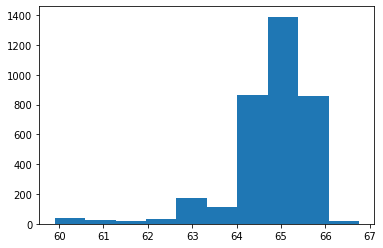

In [18]:
plt.hist(df1["Water Temperature (F)"])

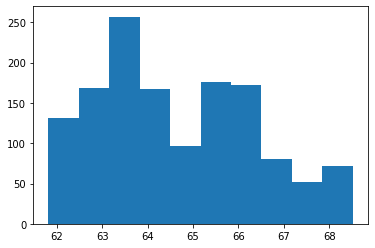

In [19]:
plt.hist(df2["Water Temperature (F)"])
plt.show()

#Box plots

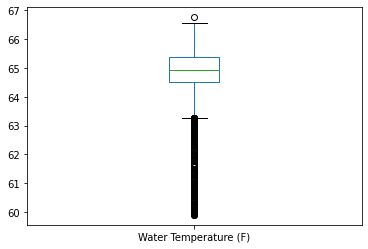

In [20]:
boxplot1 = df1.boxplot(column=["Water Temperature (F)"], grid=False)

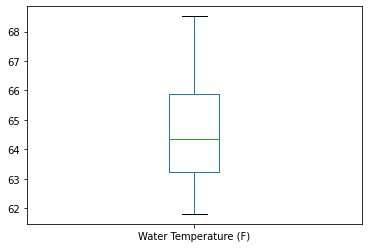

In [21]:
boxplot2 = df2.boxplot(column=["Water Temperature (F)"], grid=False)

## Hypothesis testing

Suppose we are interested to test if the mean water temperature from the period of 9/28/16 to 9/30/16 is statisticlly different from the mean water temperature from the same period a year later.
In this case, there are two populations: one is the water temperature in 2016 and the other is the water temperature in 2017. We collected two samples: one from each population. It seems that an unpaired two sample t test would be the technique to use.  

In [22]:
t16=df1["Water Temperature (F)"]
t17=df2["Water Temperature (F)"]

# Independent variable
The independent variable in this experiment is group with two levels (a discrete variable). <br>
The dependent varibale is water temperature, a continuous variable.

# Hypotheses
H0: Two group means are equal <br>
Ha: Two group means are different <br>
or <br>
H0: $\mu_{16}$$=$$\mu_{17}$ <br>
Ha: $\mu_{16}$$\neq$$\mu_{17}$ <br>

# Markdown can work with Latex to type math symbols and formulas.
* You can put formulas centered in their own lines using double \$\$ characters. <br>
* Greek letter MU is represented by \mu <br>
* subscription is done using "_" <br>
* not equal to is represented by \neq <br>
* Use \<br> for a new line

# Model Assumptions


* Assumption 1: Are the two samples independent? <br>
* Assumption 2: Are the data from each of the 2 groups following a normal distribution? <br>
* Assumption 3: Do the two samples have the same variances (Homogeneity of Variance)?

# Checking the Normality of Data
There are several methods to check whether the data is normally distributed. Here, we will use the Shapiro-Wilks test. Here’s how to examine if the data follow the normal distribution in Python:

In [23]:
stats.shapiro(df1["Water Temperature (F)"])

(0.8105882406234741, 0.0)

In [24]:
stats.shapiro(df2["Water Temperature (F)"])

(0.9602615833282471, 6.633066206292285e-19)

# Checking the Homogeneity of Variances Assumption
Remember, before carrying out a t-test in Python, we also need to make sure that the variances in the two groups are equal. Here we’ll use Levene’s test to test for homogeneity of variances (equal variances) and this can be performed with the function levene as follow:

In [25]:
stats.levene(df1["Water Temperature (F)"], df2["Water Temperature (F)"])

LeveneResult(statistic=1010.9721187854994, pvalue=6.71676967090452e-202)

Since the assumptions are violated, t test cannot be applied. Instead, we will use a nonparametric test, Mann-Whitney U Test.



## Mann-Whitney U Test

In [26]:
stat, p = stats.mannwhitneyu(t16, t17)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2192277.000, p=0.000


# 6-Step Hypothesis Testing
1. H0: $\mu_{16}$$=$$\mu_{17}$ <br>
  Ha: $\mu_{16}$$\neq$$\mu_{17}$ <br>
2. $\alpha$$=$0.05
3. Test Statistic <br>
  U=2192277.00
4. p Value
  p=0.000
5. Decision
  Reject Ho since p <0.05
6. Conclusion
  At 0.05 level of significance, there is sufficient evidence to conclude that the mean water temperature in 2016 is different from the mean temperature in 2017.